Alunos:

Fabiane Sorbar

Vinicius Tessele

Finalize o Colab original para testar todas as instâncias da base de teste. Avalie o desempenho geral e discuta.
Apresente as imagens que foram erroneamente classificadas. Discuta. Apresente as métricasprecision,recall e f1-score por classe.
Aumente os hiperparâmetros número de épocas e neurônios por camada para tentar melhorarodesempenho. Discuta. Apresente uma tabela e um gráfico dos resultados.
Substituta o otimizador original (sgd) por outros também populares (Adam, RMSprop e Nadam). Compare aperformance em termos da acurácia final e da convergência (gráfico de loss).

# <font color="#ff9900"> **MLP com Keras**</font>
---

<font color="#66ffff">**Keras**</font> (https://keras.io/) é uma biblioteca de rede neural de código aberto escrita em Python. É projetada para ser amigável ao usuário, modular e extensível, fornecendo uma interface de alto nível para construir e treinar modelos de aprendizado profundo. O Keras é construído em cima de outros *frameworks* populares de aprendizado profundo como `TensorFlow` (https://www.tensorflow.org/), Microsoft Cognitive Toolkit -`CNTK` (https://learn.microsoft.com/en-us/cognitive-toolkit/) e `Theano` (https://github.com/Theano/Theano), o que permite que ele aproveite o poder e desempenho desses *frameworks* enquanto fornece uma interface mais acessível e fácil de usar. Tais *frameworks* são o *backend* computacional do Keras.

O próprio `TensorFlow` vem com uma implementação particular do Keras, `tf.keras`. Há suporte apenas ao `TensorFlow` como *backend*, oferecendo a vantagem de suporte ao TensorFlow Data API.

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``keras`` de ``tensorflow``.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Criação do Modelo
--

Vamos criar um modelo simples com duas *hidden layers*. ``Sequential``é um modelo Keras composto de camadas empilhadas e conectadas sequencialmente entre si.

> A primeira camada define uma entrada de $28 \times 28$.

> Já a camada seguinte converte a entrada em um *array* 1D de 784 valores. No nosso caso deve receber o *shape* das imagens ($28 \times 28$), discutidas mais adiante. Prepara a entrada para as camadas *fully connected* (`Dense`) que virão a seguir.

> A próxima camada é uma camada densa com $300$ neurônios e uma função de ativação. Essa função de ativação <font color="#66ffff">**ReLU**</font> (Rectified Linear Unit) é um *rectifier*. Foi apresentada por Kunihiko Fukushima (1969) no contexto de extração de *visual features* em NNs. Principalmente a partir de 2011 vem sendo amplamente utilizada no treinamento de NNs profundas em substituição às funções *sigmoid* e *hyperbolic tangent*.


\begin{align}
  f(x) = x^+ = max(x, 0) = \left\{
        \begin{array}{cl}
             x & x \gt 0 \\
             0 & otherwise             
        \end{array}
        \right.
\end{align}

sendo $x$ o neurônio de entrada.

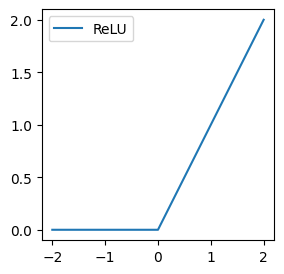

In [3]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(start = -2, stop = 2, num = 41)

fig = plt.figure(figsize=(3, 3))
ax = plt.plot(x, relu(x), label='ReLU')

plt.legend(loc='upper left')

plt.show()

> A próxima camada também é uma densa com 100 neurônios e usa a função ReLU.

> Finalmente a última camada também é uma camada densa com 10 neurônios (um por classe do nosso problema). Como as classes são exclusivas, está sendo definida a função de ativação *softmax*, produzindo probabilidades.

In [4]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

> O método ``summary()`` do objeto ``model`` exibe as camadas definidas no modelo. ``None``indica que o parâmetro *batch size* pode ser qualquer.

In [5]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


As camadas do modelo podem ser acessadas individualmente.

In [6]:
print(model.layers)

hidden1 = model.layers[1]  # first hidden layer

print(f'\nFirst hidden layer name:{hidden1.name}')

[<Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]

First hidden layer name:dense


E os parâmetros de uma camada pode ser obtidos com ``get_weights``.

Perceba os pesos (``weights``) inicializados randomicamente e os termos bias com zero.

In [7]:
weights, biases = hidden1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

Layer weights shape:
(784, 300)

Layer weights:
[[ 0.02526387  0.00698971  0.04341352 ...  0.03166784  0.03741488
   0.05964357]
 [ 0.07094732  0.03484562  0.02301651 ...  0.01661623 -0.05938311
  -0.01762962]
 [-0.0563361   0.04874282 -0.04474244 ...  0.07350852 -0.04460637
   0.04953939]
 ...
 [ 0.04635848  0.01515333  0.0614963  ...  0.03308094  0.03451352
  -0.02846262]
 [ 0.02366812 -0.04337531  0.05573642 ...  0.03827964 -0.0656559
   0.04548727]
 [-0.01804798 -0.02524669 -0.03978539 ...  0.02555659  0.05176784
   0.06044257]]

Layer biases shape:
(300,)

Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

---

> 💡 **Nota**:
É  importante destacar que as camadas densas possuem muitos parâmetros. Vejamos o caso da primeira *hidden layer*: são $784 \times 300$ pesos mais $300$ termos bias, ou seja, 235 500 parâmetros! 🙀 Essa quantidade enorme de parâmetros permite ao modelo ajustar-se de forma flexível aos dados de entrada, mas pode gerar *overfitting*, principalmente quando a quantidade de instâncias de treinamento é insuficiente.

---

Importação de um *Dataset* e Análise Exploratória
--

Vamos usar o *dataset* <font color="#ff9900">**Fashion MNIST** </font> (https://github.com/zalandoresearch/fashion-mnist) que é uma coleção de 70.000 imagens em escala de cinza de itens de vestuário, cada uma com tamanho de $28 \times 28$ pixels. Foi projetado como um substituto do conjunto de dados MNIST (http://yann.lecun.com/exdb/mnist/) mais tradicional, que contém dígitos manuscritos. Os itens de vestuário Fashion MNIST incluem itens como camisetas, calças, vestidos, tênis e sandálias, entre outros. É um *dataset* mais desafiador do que o MNIST original, pois contém imagens mais complexas e variadas. Também é mais relevante para aplicações do mundo real, pois imita de perto o tipo de imagens que são comumente encontradas em aplicativos de comércio eletrônico e *sites* de compras *on-line*.



In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Carregada a base, vamos investigar o conteúdo. Cada imagem é representada como um *array* $28 \times 28$, sendo cada intensidade na faixa $0-255$ ao invés de floats.

In [10]:
print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

Dataset shape:(60000, 28, 28)
First instance shape:(28, 28)

First instance:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141

Mas o que é esse *array*? 🤔
Vamos exibi-lo como uma imagem usando ``plt.imshow``.


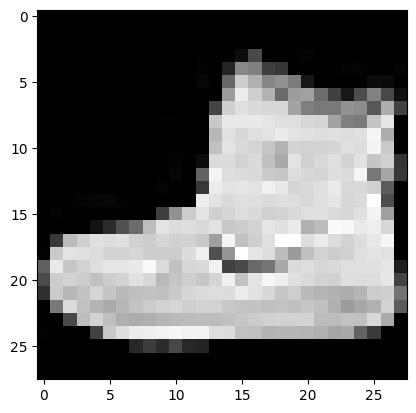

In [11]:
fig = plt.imshow(X_train_full[0], cmap=plt.cm.gray)
plt.show()

Super! Parece um tipo de calçado, *ankle boot*. 👢

Felizmente temos o rótulo de cada imagem (instância). Vamos mapear o códigos das rótulos para os nomes das classes. Veja em https://github.com/zalandoresearch/fashion-mnist.

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Vamos exibir algumas instâncias. Lembrando que os códigos dos rótulos estão em ``y_train_full``.

In [13]:
print(f'Class name of first instance: {class_names[y_train_full[0]]}')

Class name of first instance: Ankle boot


Com isso vamos gerar uma grade para visualizar as 25 primeiras instâncias do dataset `X_train_full`.

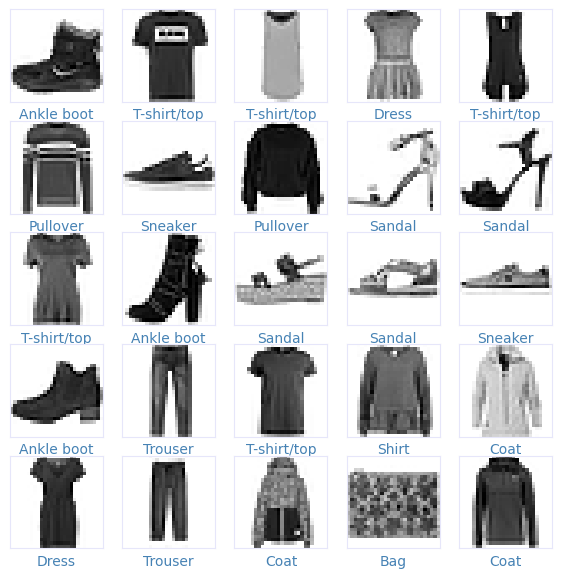

In [14]:
# import matplotlib.colors as mcolors

plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(25):  # First 25 instances
    plt.subplot(5, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]], color='steelblue')

plt.show()

Veja que o *dataset* **já veio dividido em treinamento e teste**. Mas, vamos criar um conjunto adicional de validação, `X_valid`, e o respectivo conjunto de *labels* `y_valid`. Note que separamos 5000 instâncias para o conjunto de validação e o restante será uado para o treinamento.

E como estamos utilizando uma NN com o algoritmo de treinamento <font color="#66ffff">Gradient Descent (GD) </font> devemos normalizar as *features*. Aqui vamos colocar os pixels na escala $0-1$.

In [15]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Compilação
--

Antes do modelo ser treinado ele precisa ser compilado através do método `compile`. Nesse momento especificamos qual será a função *loss* e qual será o otimizador. Opcionalmente podemos fornecer quais métricas de avaliação desejamos calcular durante o processo de treinamento, como por exemplo `accuracy`.

> A função `sparse_categorical_crossentropy` é usada para classes mutuamente exclusivas, i.e., cada instância pertence exatamente a uma classe. No nosso caso, índices exclusivos na faixa de $0$ a $9$.

> Nosso otimizador será Stochastic Gradient Descent (`sgd`). O default do *learning rate* é $0.01$. Assim, opcionalmente pode-se usar em `compile` com `optimizer=keras.optimizers.SGD(lr=eta)` fornecendo em `eta` o valor de *learning rate* desejado.

> Finalmente, em geral, desejamos saber a acurácia do nosso modelo classificador. Assim setamos `metrics` para `accuracy`.


Depois de compilado nosso modelo está pronto para ser treinado. Vamos lá!

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Treinamento
--

Para efetuar o treinamento basta chamar o método ``fit``, especificando o conjunto de treinamento ``X_train``, os respectivos labels ``y_train``, o número de épocas, aqui 30, e os conjuntos de validação correspondentes.


---

> 💡 **Nota**:
Destaca-se que a **validação é opcional**.

---


In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6845 - loss: 1.0089 - val_accuracy: 0.8300 - val_loss: 0.5026
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8244 - loss: 0.5029 - val_accuracy: 0.8428 - val_loss: 0.4491
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8441 - loss: 0.4474 - val_accuracy: 0.8446 - val_loss: 0.4278
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8511 - loss: 0.4173 - val_accuracy: 0.8538 - val_loss: 0.4131
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8601 - loss: 0.4012 - val_accuracy: 0.8586 - val_loss: 0.4130
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8660 - loss: 0.3841 - val_accuracy: 0.8688 - val_loss: 0.3766
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8693 - loss: 0.3682 - val_accuracy: 0.8710 - val_loss: 0.3628
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3556 - 

> Avaliação do Treinamento

Vamos plotar as curvas de acurácia e *loss*.

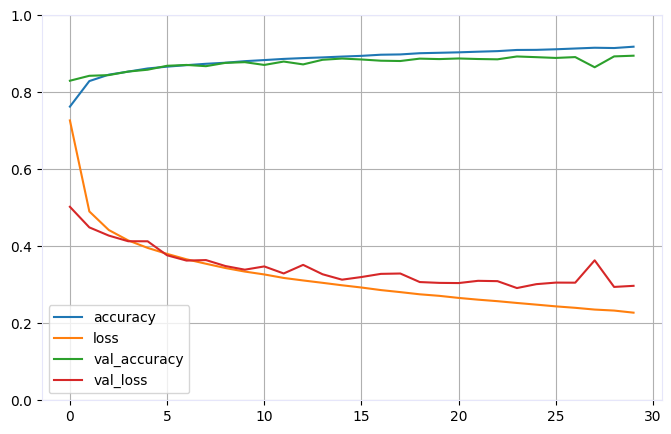

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 66.6374


[70.2242431640625, 0.8323000073432922]

Conseguimos $\approx 85\%$!😹🥳

Classificação
--

Uma vez treinado o modelo podemos fazer predições com o método ``predict``.

Vamos ver como o modelo comporta-se com as vinte primeiras instâncias.

In [20]:
X_new = X_test[:20]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Probability scores:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


O modelo estima uma probabilidade por classe.

Mas, quais são essas classes?

In [21]:
classes_y = np.argmax(y_proba, axis=1)

print(classes_y)

print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')

[9 2 1 1 0 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
Predicted classes:
 ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'T-shirt/top' 'Trouser'
 'Coat' 'Shirt' 'Sandal' 'Sneaker' 'Coat' 'Sandal' 'Sandal' 'Dress' 'Coat'
 'Trouser' 'Pullover' 'Pullover' 'Bag' 'T-shirt/top']


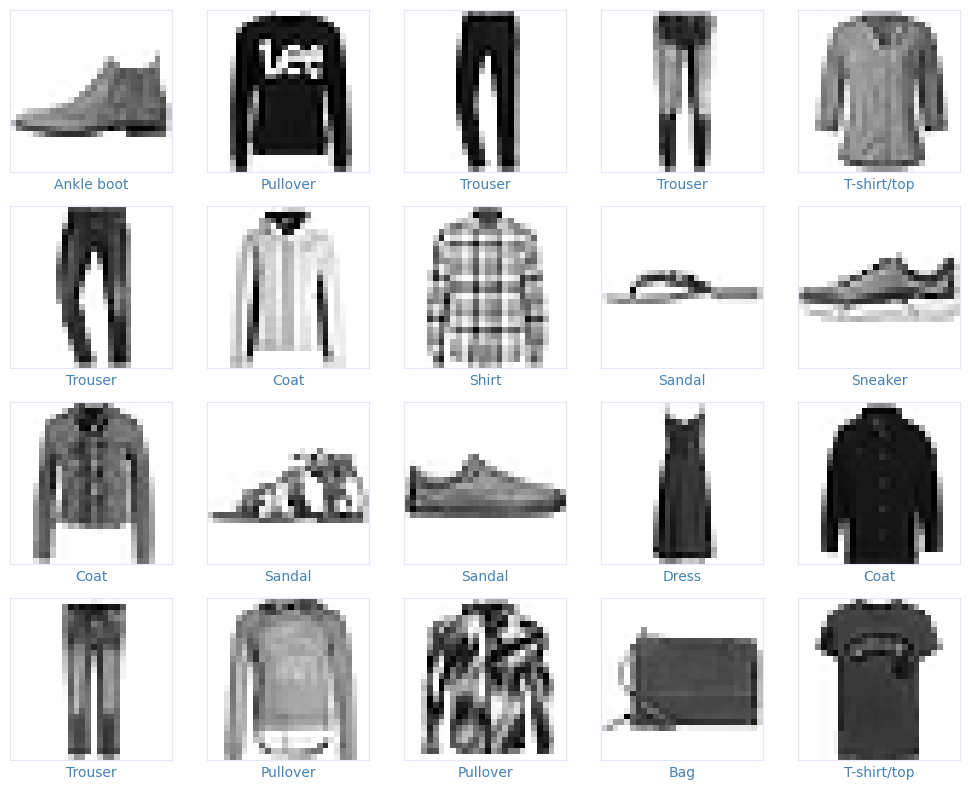

In [22]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(10, 8))

for i in range(20):  # First 20 instances
    plt.subplot(4, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[classes_y[i]], color='steelblue')

plt.tight_layout()
plt.show()

*Les carottes sont cuites!* 🥕🥕🥕

---
<font color="#ffb31a">Fabio Alexandre **SPANHOL**</font> <faspanhol@gmail.com>

<font color="#cccccc">*Updated: May 15th 2025*</font>

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Número de erros: 1677


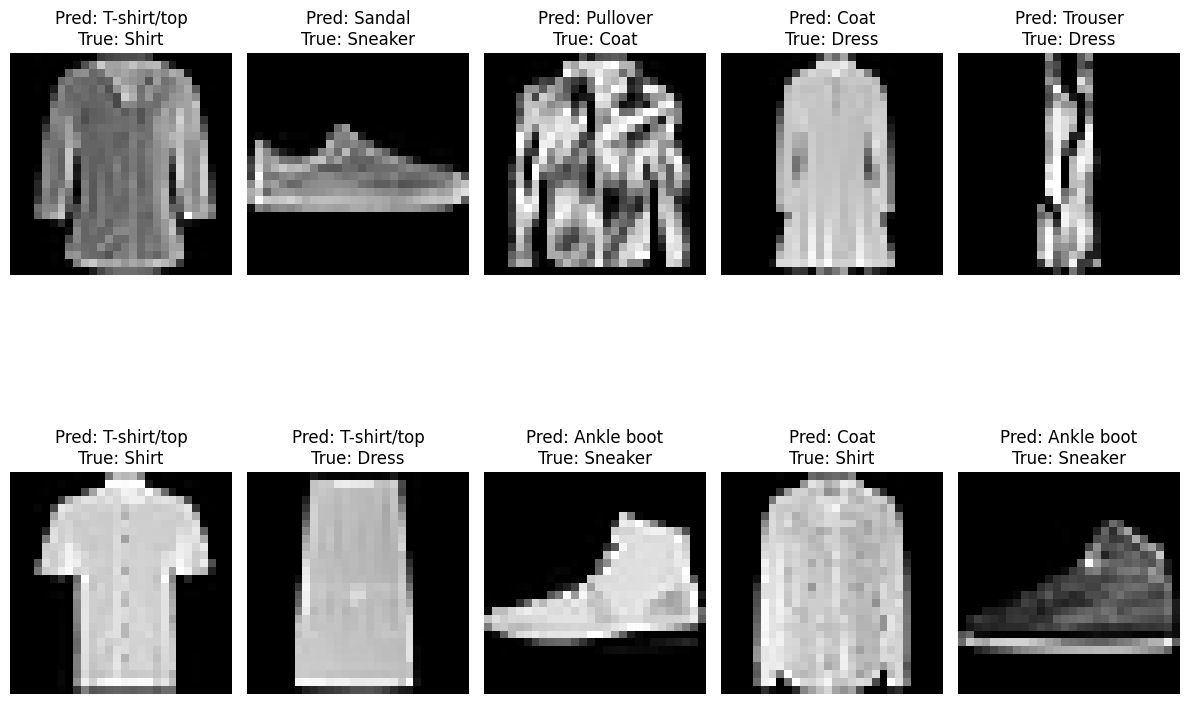

In [25]:
# Exibir as primeiras 10 imagens incorretas
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = y_test  # já está em formato 1D com os rótulos
errors = np.where(y_pred_labels != y_true_labels)[0]
print(f"Número de erros: {len(errors)}")
plt.figure(figsize=(12, 10))
for i, index in enumerate(errors[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred_labels[index]]}\nTrue: {class_names[y_true_labels[index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Precision, recall e f1-score por classe

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_true_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1000
           1       0.88      0.98      0.93      1000
           2       0.81      0.66      0.73      1000
           3       0.93      0.75      0.83      1000
           4       0.57      0.95      0.71      1000
           5       0.98      0.91      0.94      1000
           6       0.84      0.38      0.52      1000
           7       0.97      0.85      0.90      1000
           8       0.93      0.98      0.96      1000
           9       0.83      0.99      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.83     10000
weighted avg       0.85      0.83      0.83     10000



Teste do modelo com apenas 20 épocas

In [28]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9247 - loss: 0.2053 - val_accuracy: 0.8944 - val_loss: 0.2878
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9253 - loss: 0.2059 - val_accuracy: 0.8874 - val_loss: 0.3174
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9297 - loss: 0.1984 - val_accuracy: 0.8924 - val_loss: 0.2973
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9300 - loss: 0.1955 - val_accuracy: 0.8920 - val_loss: 0.3000
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9296 - loss: 0.1940 - val_accuracy: 0.8842 - val_loss: 0.3217
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9337 - loss: 0.1882 - val_accuracy: 0.8996 - val_loss: 0.2912
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9318 - loss: 0.1894 - val_accuracy: 0.8952 - val_loss: 0.2910
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9343 - loss: 0.1861 - 

Com menos época obtivamos 86% de acurrácia

In [29]:
# Modelo com mais neurônios e mais épocas
model_deep = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_deep.compile(loss="sparse_categorical_crossentropy",
                   optimizer="sgd",
                   metrics=["accuracy"])

history_deep = model_deep.fit(X_train, y_train, epochs=30,
                              validation_data=(X_valid, y_valid))

test_loss_deep, test_acc_deep = model_deep.evaluate(X_test, y_test)
print(f'\nDeep model Test accuracy: {test_acc_deep:.4f}')


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7006 - loss: 0.9513 - val_accuracy: 0.8350 - val_loss: 0.4894
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8275 - loss: 0.4939 - val_accuracy: 0.8544 - val_loss: 0.4268
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8465 - loss: 0.4406 - val_accuracy: 0.8576 - val_loss: 0.4250
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8558 - loss: 0.4143 - val_accuracy: 0.8652 - val_loss: 0.3988
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8637 - loss: 0.3897 - val_accuracy: 0.8704 - val_loss: 0.3752
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8670 - loss: 0.3747 - val_accuracy: 0.8732 - val_loss: 0.3657
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8758 - loss: 0.3566 - val_accuracy: 0.8826 - val_loss: 0.3495
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8778 - loss: 0.3441 -

In [30]:
optimizers = {
    "Adam": keras.optimizers.Adam(),
    "RMSprop": keras.optimizers.RMSprop(),
    "Nadam": keras.optimizers.Nadam()
}

results = []

for name, opt in optimizers.items():
    model_opt = keras.models.Sequential([
        keras.layers.Input(shape=(28, 28)),
        keras.layers.Flatten(),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model_opt.compile(loss="sparse_categorical_crossentropy",
                      optimizer=opt,
                      metrics=["accuracy"])

    print(f"\nTreinando com otimizador: {name}")
    history_opt = model_opt.fit(X_train, y_train, epochs=20,
                                validation_data=(X_valid, y_valid),
                                verbose=0)

    acc = model_opt.evaluate(X_test, y_test, verbose=0)[1]
    results.append({
        "Otimizador": name,
        "Acurácia final": acc,
        "Histórico": history_opt
    })


Treinando com otimizador: Adam

Treinando com otimizador: RMSprop

Treinando com otimizador: Nadam


  Otimizador  Acurácia final
0       Adam          0.8635
1    RMSprop          0.8464
2      Nadam          0.8598


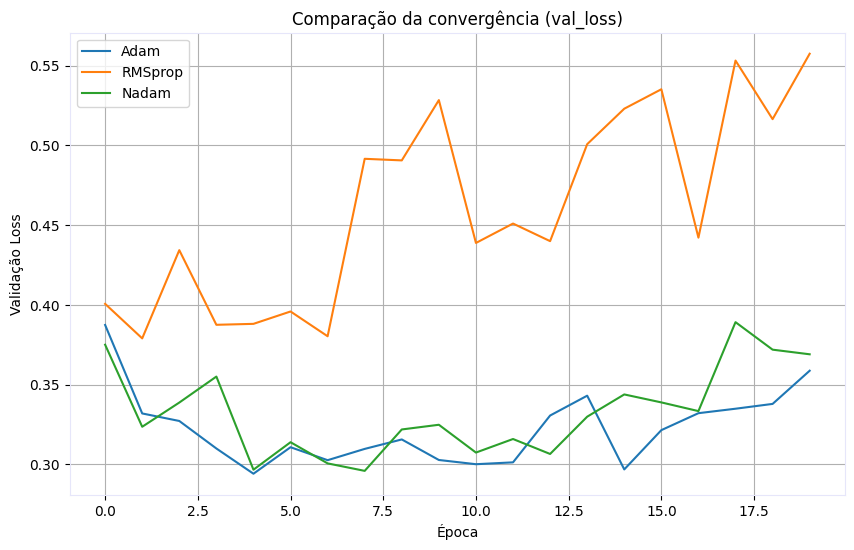

In [31]:
df_results = pd.DataFrame(results).drop(columns=['Histórico'])
print(df_results)

plt.figure(figsize=(10, 6))
for r in results:
    plt.plot(r["Histórico"].history["val_loss"], label=r["Otimizador"])
plt.xlabel("Época")
plt.ylabel("Validação Loss")
plt.title("Comparação da convergência (val_loss)")
plt.legend()
plt.grid(True)
plt.show()

**Discussões**

Desempenho geral:
Utilizando otimizadores com 20 épocas (Adam, RMSprop, Nadam)

0       Adam          0.8635
1    RMSprop          0.8464
2      Nadam          0.8598

Indica que mesmo uma arquitetura simples, a rede é capaz de aprender padrões com desenpenho razoável.

O modelo sgd com mais neurônios e 30 épocas 85% sendo que com menos neurônios obteve resultado semelhante. A redusão de neurônios para 20 fez com que a acurácia ficasse com 86%






Treinando com otimizador: Adam

Treinando com otimizador: RMSprop

Treinando com otimizador: Nadam
  Otimizador  Acurácia final
0       Adam          0.8672
1    RMSprop          0.8476
2      Nadam          0.8661


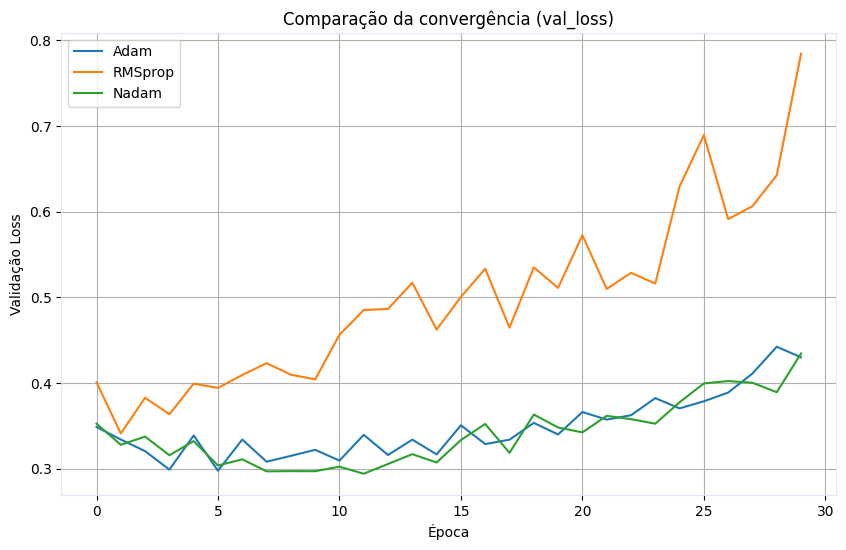

In [32]:
optimizers = {
    "Adam": keras.optimizers.Adam(),
    "RMSprop": keras.optimizers.RMSprop(),
    "Nadam": keras.optimizers.Nadam()
}

results = []

for name, opt in optimizers.items():
    model_opt = keras.models.Sequential([
        keras.layers.Input(shape=(28, 28)),
        keras.layers.Flatten(),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model_opt.compile(loss="sparse_categorical_crossentropy",
                      optimizer=opt,
                      metrics=["accuracy"])

    print(f"\nTreinando com otimizador: {name}")
    history_opt = model_opt.fit(X_train, y_train, epochs=30,
                                validation_data=(X_valid, y_valid),
                                verbose=0)

    acc = model_opt.evaluate(X_test, y_test, verbose=0)[1]
    results.append({
        "Otimizador": name,
        "Acurácia final": acc,
        "Histórico": history_opt
    })


df_results = pd.DataFrame(results).drop(columns=['Histórico'])
print(df_results)

plt.figure(figsize=(10, 6))
for r in results:
    plt.plot(r["Histórico"].history["val_loss"], label=r["Otimizador"])
plt.xlabel("Época")
plt.ylabel("Validação Loss")
plt.title("Comparação da convergência (val_loss)")
plt.legend()
plt.grid(True)
plt.show()



| Otimizador  | Acurácia (20 épocas) | Acurácia (30 épocas) | Variação (%) |
|-------------|----------------------|----------------------|---------------|
| **Adam**    | 0.8635               | 0.8672               | **+0,43%**    |
| **RMSprop** | 0.8464               | 0.8476               | **+0,14%**    |
| **Nadam**   | 0.8598               | 0.8661               | **+0,73%**    |

Observa-se que todos os otimizadores apresentaram um pequeno ganho de desempenho com o aumento do número de épocas, indicando que o modelo continuou aprendendo, ainda que de forma modesta. O Nadam teve o maior ganho percentual de acurácia (+0,73%), seguido por Adam (+0,43%) e RMSprop (+0,14%).